In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz

In [2]:
pip install graphviz

In [3]:
import graphviz

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [8]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [9]:
# .dot 파일로 export 해 줌
export_graphviz(dt, out_file='tree.dot', 
                class_names = iris.target_names, 
                feature_names=iris.feature_names, 
                impurity=True, # gini 출력
                filled =True) # class별 color 채우기

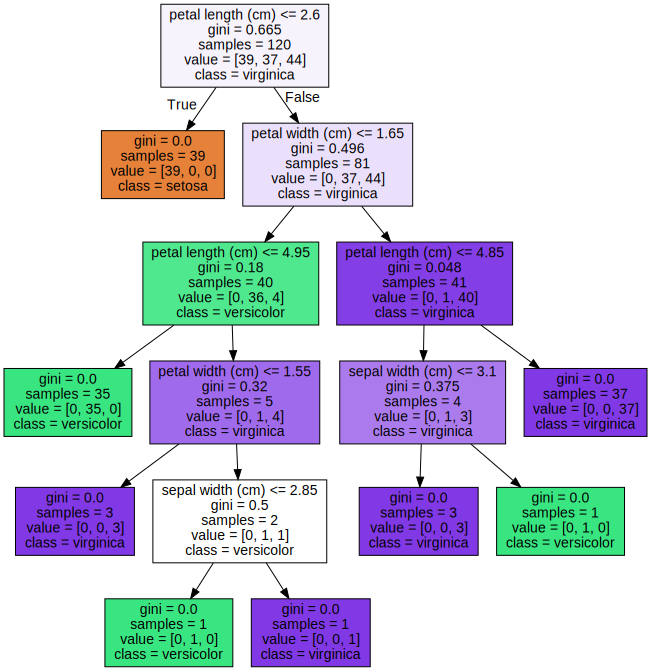

In [10]:
with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph) #dot_graph의 source저장



---



---



## **Decision Tree의 과적합을 감소시킬 수 있는 규제 매개변수**


*   max_depth : 트리 최대 깊이
*   mean_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
*   mean_samples_leaf : leaf node가 가지고 있어야 할 최소 샘플 수








In [11]:
dt_md = DecisionTreeClassifier(max_depth=3 ,random_state=1)
dt_md.fit(X_train, y_train)  # 학습

DecisionTreeClassifier(max_depth=3, random_state=1)

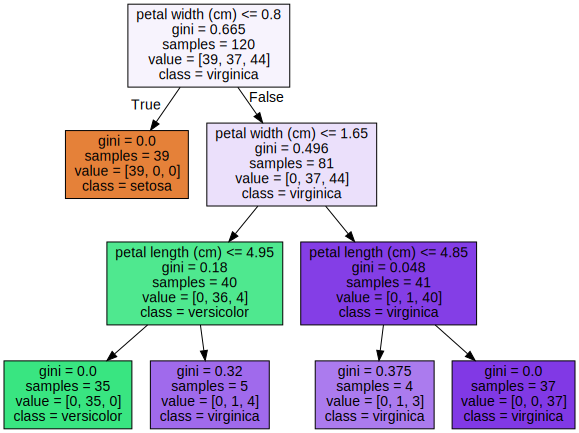

In [12]:
export_graphviz(dt_md, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()  
graphviz.Source(dot_graph)  #시각화



---



In [13]:
dt_ms = DecisionTreeClassifier(min_samples_split=4 ,random_state=1) 
dt_ms.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=1)

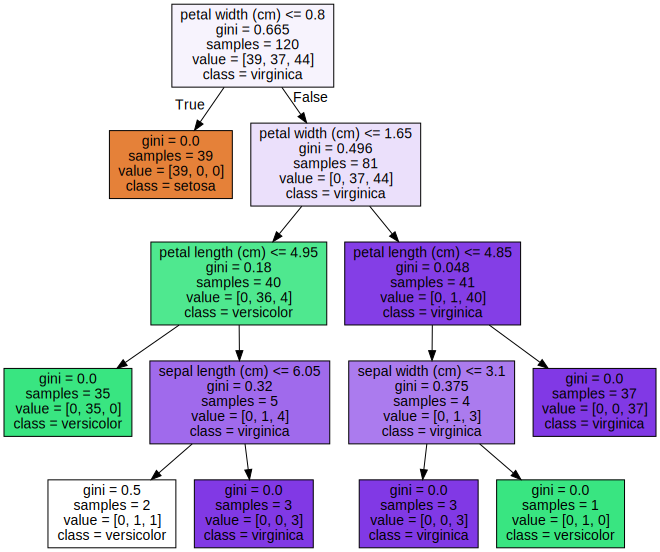

In [14]:
export_graphviz(dt_ms, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#sample 갯수가 3인 경우 샘플 내 상이한 값이 있어도 더 이상 분할하지 않음



---



In [15]:
dt_ms = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=1) #leaf node가 될 수 있는 샘플 데이터의 최소 갯수 지정
dt_ms.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=1)

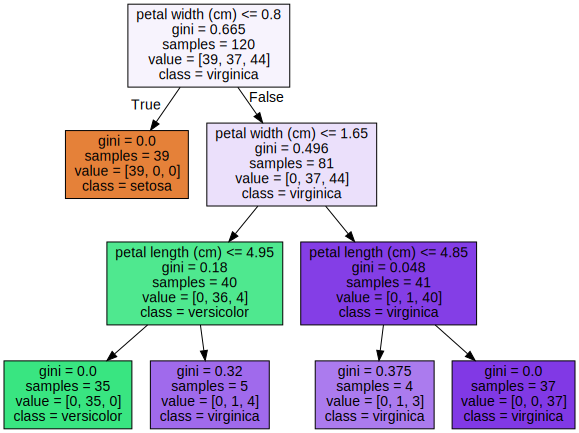

In [16]:
export_graphviz(dt_ms, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



---





### **Using Entropy instead of Gini**

In [17]:
dt_entropy = DecisionTreeClassifier(random_state=1, criterion="entropy")
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

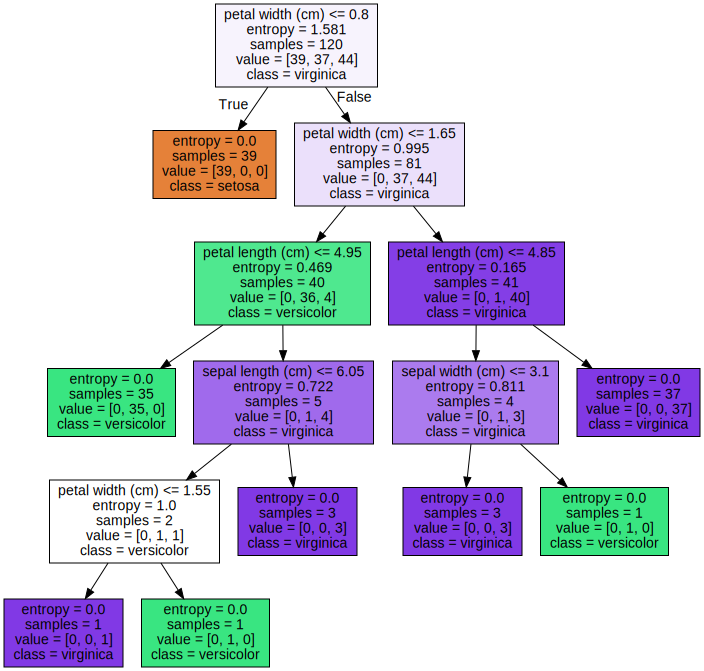

In [18]:
export_graphviz(dt_entropy, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## **Hyper-parameter Tuning**

In [19]:
dt = DecisionTreeClassifier(random_state=1)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
params = {
    'max_depth': [2, 3, 4, 7],
    'min_samples_leaf': [3, 4, 7, 10, 20],
    'criterion': ["gini", "entropy"]
}
# 파라미터를 여러가지로 해보고 최적의 파라미터를 찾아보겠다 Grid Search + CV = 최적의 파라미터를 찾아주고, 추가적으로 교차 검증까지 수행해주는 최적화 방식

In [22]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params,
                           cv=4, scoring = "accuracy")  # cv defalut 값 5, 교차 검증

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 7],
                         'min_samples_leaf': [3, 4, 7, 10, 20]},
             scoring='accuracy')

In [24]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001239,0.000134,0.000454,0.000094,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7
1,0.000713,0.000014,0.000271,0.000018,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7
2,0.000687,0.000007,0.000251,0.000005,gini,2,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7
3,0.000698,0.000021,0.000248,0.000012,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7
4,0.000683,0.000006,0.000254,0.000007,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.966667,0.833333,0.9,0.9,0.9,0.04714,7


In [25]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,0.000719,0.000026,0.000264,0.000024,gini,3,3,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1
10,0.000711,0.000016,0.000261,0.000016,gini,4,3,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1
15,0.001619,0.001534,0.000275,0.000028,gini,7,3,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1
25,0.000739,0.000013,0.000254,0.000006,entropy,3,3,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1
30,0.000772,0.000080,0.000266,0.000011,entropy,4,3,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.966667,0.966667,0.9,0.9,0.933333,0.033333,1


In [26]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=1)

In [27]:
dt_best=grid_search.best_estimator_

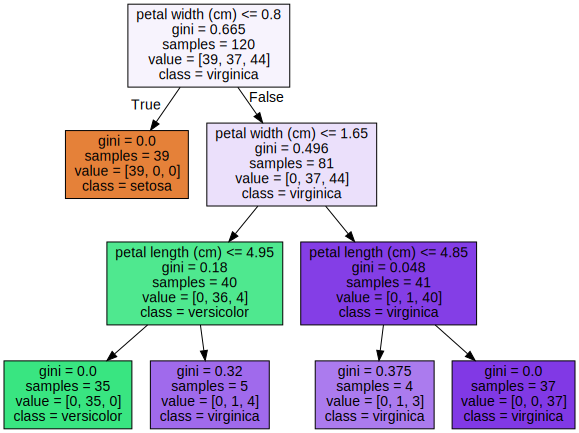

In [28]:
export_graphviz(dt_best, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)  # 여러 파라미터 중 가장 최적화된 파라미터 사용

# **퀴즈 1**


*   최대 깊이가 4인 Decision Tree를 시각화하시오. (단, gini index가 아닌 entropy를 사용할 것)


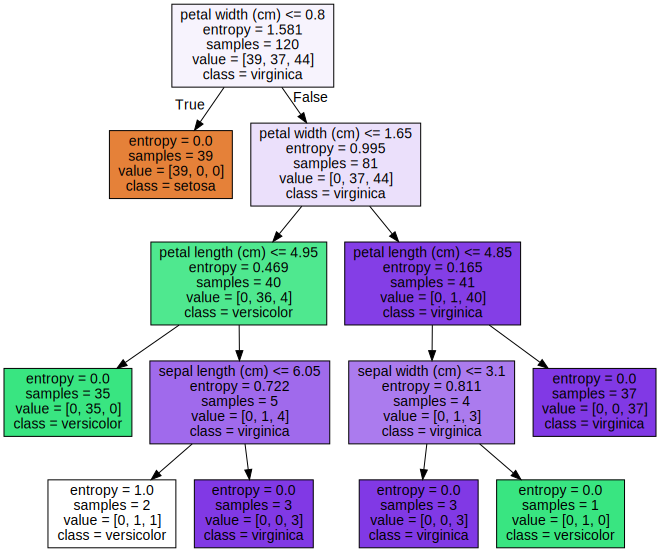

In [30]:
dt_entropy = DecisionTreeClassifier(max_depth=4, random_state=1, criterion="entropy")
dt_entropy.fit(X_train, y_train)

export_graphviz(dt_entropy, out_file="tree.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)